# 🏦 Credit Risk Analysis — Data Preparation & EDA

This notebook documents the **data preparation and exploratory data analysis (EDA)** work completed for the  
**Onyx Data Challenge (September 2025) — Credit Risk Analysis**.

---

## 📌 Project Goal

Banks must decide who to lend to while controlling default risk and ensuring fair, profitable lending.  
This analysis aims to help a bank **understand which borrowers are more likely to default and why**, so it can:

- Adjust lending policies to reduce risk
- Price loans more accurately based on borrower profiles
- Spot early warning signs of potential default

---

## 🗂️ Dataset Overview

- ~32,000 loan records from individual borrowers
- Features include:
  - **Borrower profile:** age, income, home ownership, employment length/type, marital status, education
  - **Loan details:** amount, purpose, interest rate, grade, term, loan-to-income ratio (LTI)
  - **Credit behavior:** past defaults, credit history length, open accounts, utilization ratio, past delinquencies
  - **Geography:** country, state, city

**Target variable:**  
`loan_status` — 1 = default, 0 = repaid

---

## ⚡ Notebook Contents

1. **Data loading & initial inspection**  
   - Shape, data types, missing values, duplicates
2. **Data quality check & cleaning**  
   - Handling missing values and extreme outliers
3. **Feature exploration**  
   - Numeric distributions (age, income, loan amount, LTI, DTI)
   - Categorical profiles (loan intent, grade, home ownership, employment)
   - Correlation checks
4. **Export cleaned dataset**  
   - Prepare dataset for visualization and dashboard development in Tableau

---

📊 The cleaned and profiled dataset is used to create three Tableau dashboards:
- Loan Portfolio Snapshot
- Lending Risk Analysis
- Borrower Risk Profile

🔗 Interactive dashboards: [View on Tableau Public](https://public.tableau.com/views/CreditRiskAnalylsis/BorrowerRiskProfile)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

NOTE: The original dataset is not included due to content rights by Onyx Data. Please download it independently from the Onyx Data Challenge portal.

In [2]:

pd.set_option('display.max_columns', None)
df = pd.read_excel('data.xlsx')

In [3]:
df.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00001,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,Male,Married,High School,Canada,Ontario,Toronto,43.6532,-79.3832,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0
1,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,Female,Divorced,Master,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Female,Married,Master,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Male,Married,Bachelor,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Female,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0


In [4]:
#No of observations
df.shape

(32581, 29)

In [5]:
#check to ensure each customer is unique
df.client_ID.nunique()

32581

In [9]:
def dataset_summary(df):
    summary = pd.DataFrame({
        "Column": df.columns,
        "Data Type": df.dtypes.values,
        "Non-Null Count": df.notnull().sum().values,
        "Missing Count": df.isnull().sum().values,
        "Missing %": (df.isnull().mean().values * 100).round(2),
        "Unique Values": [df[col].nunique() for col in df.columns]
    })
    return summary

# Usage
summary_table = dataset_summary(df)
summary_table

,Column,Data Type,Non-Null Count,Missing Count,Missing %,Unique Values
0,client_ID,object,32581,0,0.00,32581
1,person_age,int64,32581,0,0.00,58
2,person_income,int64,32581,0,0.00,4295
3,person_home_ownership,object,32581,0,0.00,4
4,person_emp_length,float64,31686,895,2.75,36
5,loan_intent,object,32581,0,0.00,6
6,loan_grade,object,32581,0,0.00,7
7,loan_amnt,int64,32581,0,0.00,753
8,loan_int_rate,float64,29465,3116,9.56,348
9,loan_status,int64,32581,0,0.00,2


895 clients have not indicated their length of employment (or there was a mistake in data entry). Need to check whether it can be a signal for potential loan default.

in 3115 case the loan interest rate is not indicated, some of them are already in default. need to check the correctness of data entry.

In [10]:
#Now let's check certain (numerical) columns for outliers to see the consistency of our data

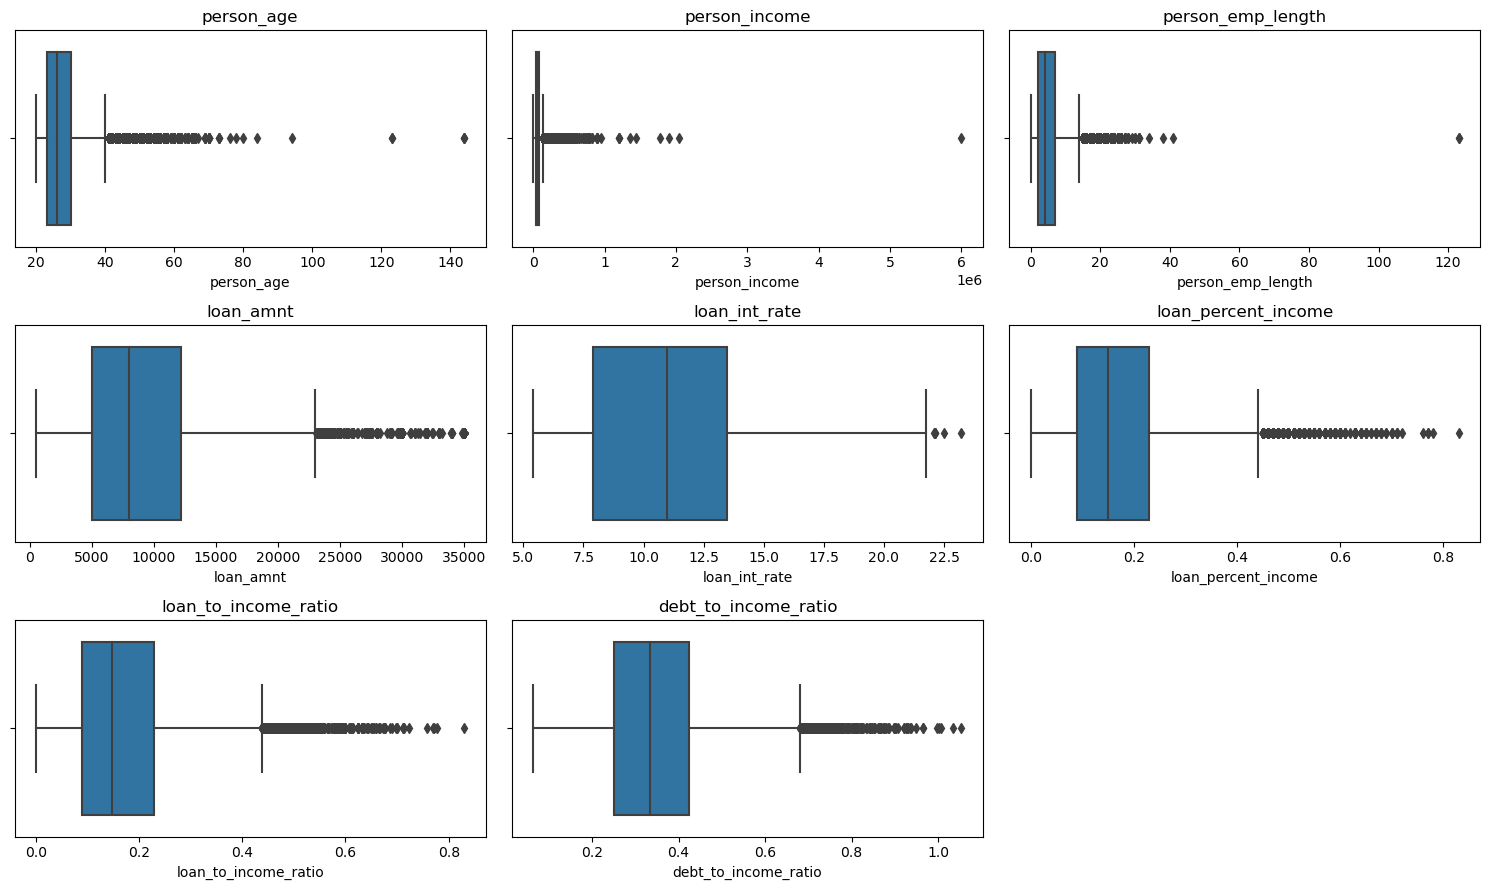

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select columns you want to plot
selected_cols = [
    "person_age",
    "person_income",
    "person_emp_length",
    "loan_amnt",
    "loan_int_rate",
    "loan_percent_income",
    "loan_to_income_ratio",
    "debt_to_income_ratio"
]

# Define number of rows & cols for subplots
n_cols = 3   # number of plots per row
n_rows = -(-len(selected_cols) // n_cols)  # ceiling division

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 3*n_rows))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each boxplot
for i, col in enumerate(selected_cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(col)

# Remove empty plots (if grid > number of columns)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("boxplots_overview.png", dpi=300)  # Save as image
plt.show()

In [13]:
#In the column with age there are difinite outliers that liy beyond the age of 120, which seems erros in data entry.
#We will delete the rows with this outliers from the dataset.
#The outliers in employment length also look like the error in data entry. It seems that all employment lengrh
#which ius over 60 can be dropped
#in other columns the outliers may seem extreme, but still can be valid. We will keep all the financial outliers.

df1 = df[(df['person_age'] < 100) & (df['person_emp_length'] < 60)]
df1.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
1,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,Female,Divorced,Master,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Female,Married,Master,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Male,Married,Bachelor,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Female,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0
5,CUST_00006,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,Male,Single,High School,USA,California,San Francisco,37.7749,-122.4194,Full-time,36,0.252525,2211.741134,0.475933,10,0.827034,0


In [14]:
df1.shape


(31679, 29)

## Borrower Profile


In [15]:
#Let's start with statistical description of the borrowers features
pd.set_option('display.float_format', '{:,.2f}'.format)
df1[['person_age','person_income','person_emp_length']].describe()

,person_age,person_income,person_emp_length
count,"31,679.00","31,679.00","31,679.00"
mean,27.73,"66,490.10",4.78
std,6.21,"52,768.79",4.03
min,20.00,"4,000.00",0.00
25%,23.00,"39,366.00",2.00
50%,26.00,"56,000.00",4.00
75%,30.00,"80,000.00",7.00
max,94.00,"2,039,784.00",41.00


In [16]:
#Home ownership profile
df1.person_home_ownership.value_counts()

RENT        16072
MORTGAGE    13090
OWN          2410
OTHER         107
Name: person_home_ownership, dtype: int64

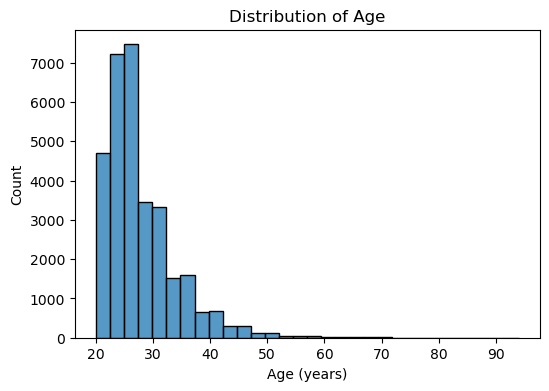

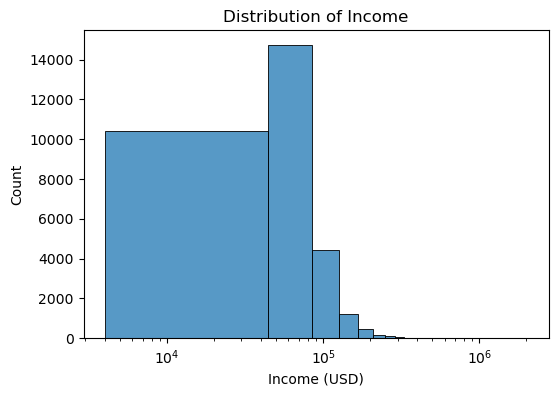

In [17]:
#now let's visualize the age an income
# Histogram of Age
plt.figure(figsize=(6,4))
sns.histplot(df1['person_age'], bins=30, kde=False)
plt.title("Distribution of Age")
plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.show()

# Histogram of Income (log scale helps since incomes are skewed)
plt.figure(figsize=(6,4))
sns.histplot(df1['person_income'], bins=50, kde=False)
plt.title("Distribution of Income")
plt.xlabel("Income (USD)")
plt.ylabel("Count")
plt.xscale("log")  # Optional: log scale makes high incomes visible
plt.show()

In [18]:
df1[(df1['person_income']>1000000)]

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
17833,CUST_17834,32,1200000,MORTGAGE,1.00,VENTURE,A,12000,7.51,0,0.01,N,8,Female,Single,High School,USA,Texas,Houston,29.76,-95.37,Full-time,36,0.01,"329,604.87",0.28,8,0.58,0
29119,CUST_29120,36,1200000,OWN,16.00,MEDICAL,A,10000,6.54,0,0.01,N,11,Male,Divorced,High School,Canada,Ontario,Ottawa,45.42,-75.70,Self-employed,24,0.01,"326,902.87",0.28,10,0.22,0
29120,CUST_29121,40,1200000,MORTGAGE,1.00,MEDICAL,A,10000,NaN,0,0.01,N,16,Male,Single,High School,USA,New York,New York City,40.71,-74.01,Full-time,36,0.01,"318,155.63",0.27,12,0.61,1
30049,CUST_30050,42,2039784,RENT,0.00,VENTURE,C,8450,12.29,0,0.00,Y,15,Female,Single,Master,UK,Scotland,Edinburgh,55.95,-3.19,Full-time,36,0.00,"246,362.41",0.12,11,0.05,0
31922,CUST_31923,47,1362000,MORTGAGE,9.00,VENTURE,A,6600,7.74,0,0.00,N,17,Male,Single,Bachelor,UK,England,Manchester,53.48,-2.24,Part-time,60,0.00,"304,498.46",0.23,10,0.90,1
31924,CUST_31925,44,1440000,MORTGAGE,7.00,DEBTCONSOLIDATION,A,6400,7.40,0,0.00,N,15,Female,Single,Bachelor,USA,New York,Buffalo,42.89,-78.88,Full-time,36,0.00,"234,033.09",0.17,13,0.63,1
32497,CUST_32498,63,1782000,RENT,13.00,EDUCATION,C,12025,14.27,0,0.01,N,30,Male,Married,Bachelor,USA,New York,New York City,40.71,-74.01,Full-time,12,0.01,"399,125.75",0.23,10,0.89,0
32546,CUST_32547,60,1900000,MORTGAGE,5.00,PERSONAL,A,1500,NaN,0,0.00,N,21,Male,Married,Bachelor,Canada,Ontario,Ottawa,45.42,-75.70,Full-time,24,0.00,"368,669.88",0.19,13,0.49,1


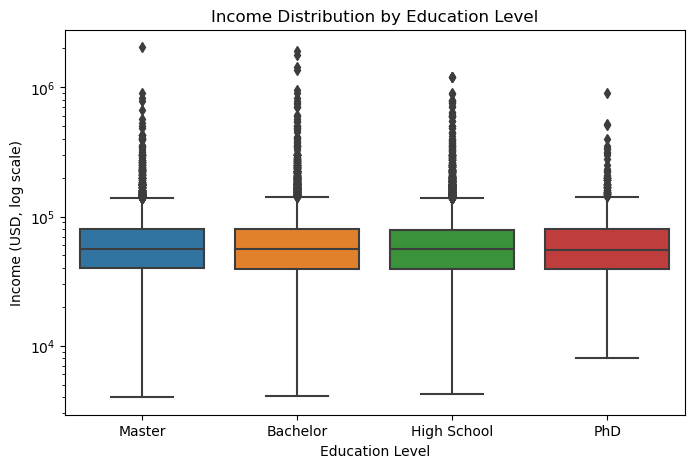

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x="education_level", y="person_income", data=df1)
plt.yscale("log")  # optional, since income is skewed
plt.title("Income Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Income (USD, log scale)")
plt.show()

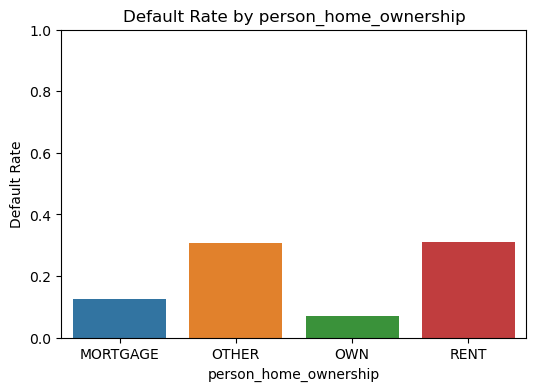

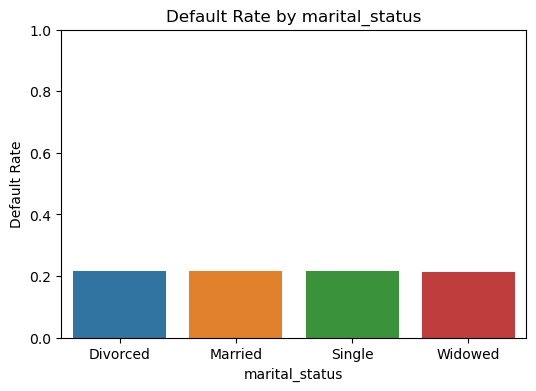

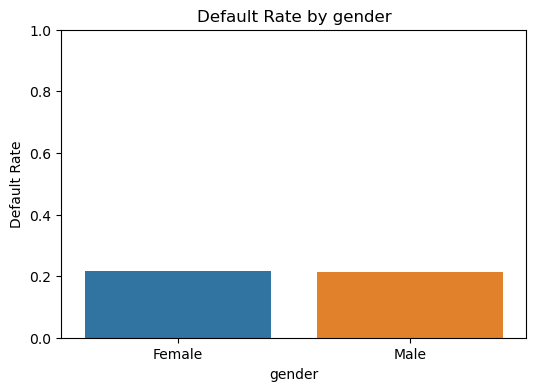

In [20]:
# Helper function to plot default rates
def plot_default_rate(col):
    default_rate = df1.groupby(col)['loan_status'].mean().reset_index()
    plt.figure(figsize=(6,4))
    sns.barplot(x=col, y="loan_status", data=default_rate)
    plt.title(f"Default Rate by {col}")
    plt.ylabel("Default Rate")
    plt.xlabel(col)
    plt.ylim(0, 1)  # default rate between 0 and 1
    plt.show()

# Run for each categorical variable
for col in ["person_home_ownership", "marital_status", "gender"]:
    plot_default_rate(col)

## Loan Characteristics


In [21]:
df1[['loan_amnt','loan_int_rate','loan_percent_income','loan_to_income_ratio']].describe()


,loan_amnt,loan_int_rate,loan_percent_income,loan_to_income_ratio
count,"31,679.00","28,632.00","31,679.00","31,679.00"
mean,"9,659.96",11.04,0.17,0.17
std,"6,334.36",3.23,0.11,0.11
min,500.00,5.42,0.00,0.00
25%,"5,000.00",7.90,0.09,0.09
50%,"8,000.00",10.99,0.15,0.15
75%,"12,500.00",13.48,0.23,0.23
max,"35,000.00",23.22,0.83,0.83


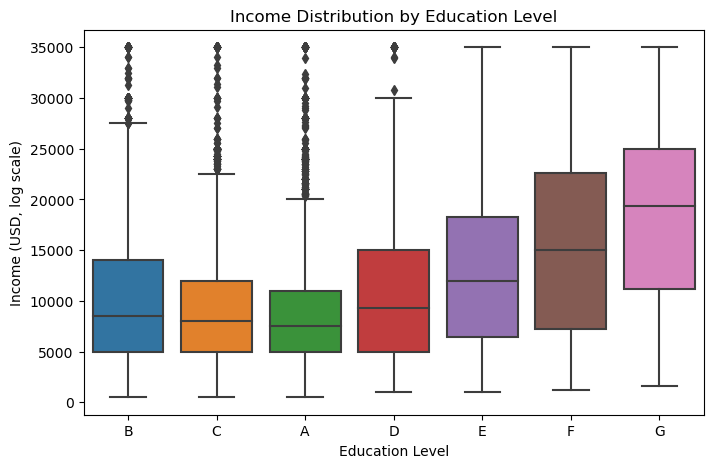

In [22]:
#Loan amount by Loan Grade

plt.figure(figsize=(8,5))
sns.boxplot(x="loan_grade", y="loan_amnt", data=df1)
#plt.yscale("log")  # optional, since income is skewed
plt.title("Income Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Income (USD, log scale)")
plt.show()


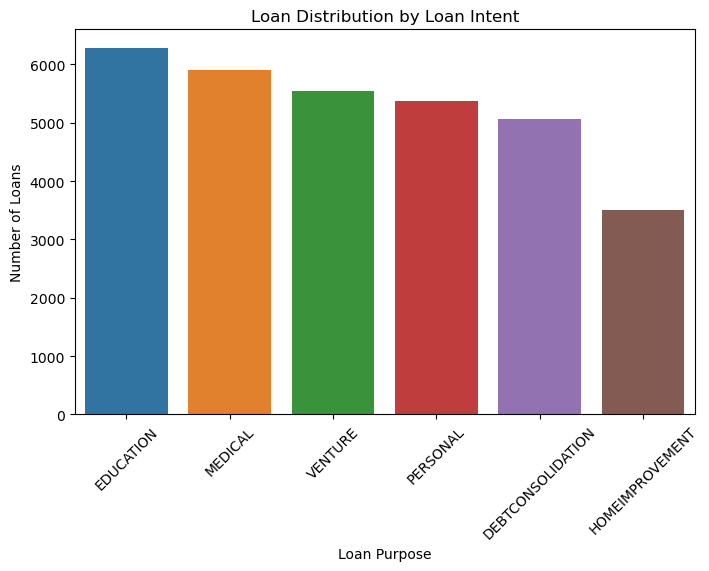

EDUCATION           19.85
MEDICAL             18.61
VENTURE             17.53
PERSONAL            16.94
DEBTCONSOLIDATION   15.99
HOMEIMPROVEMENT     11.08
Name: loan_intent, dtype: float64


In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x="loan_intent", data=df1, order=df1['loan_intent'].value_counts().index)
plt.title("Loan Distribution by Loan Intent")
plt.xlabel("Loan Purpose")
plt.ylabel("Number of Loans")
plt.xticks(rotation=45)
plt.show()

# Percentage distribution (table view)
loan_intent_dist = df1['loan_intent'].value_counts(normalize=True) * 100
print(loan_intent_dist)

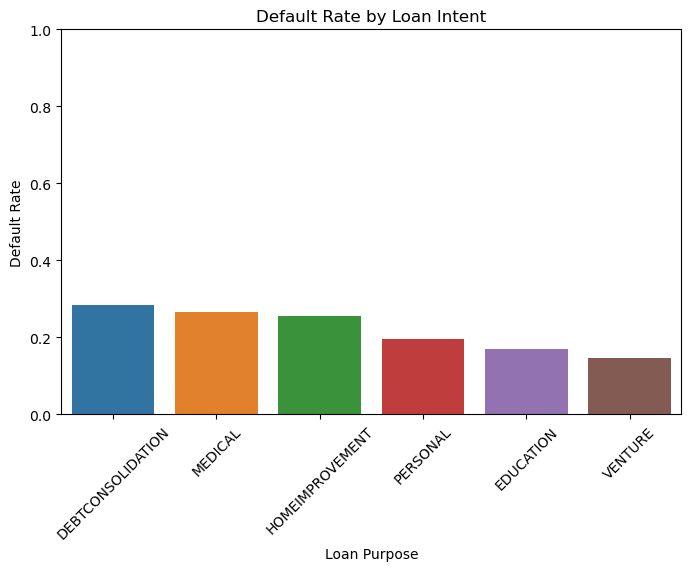

In [24]:
loan_intent_default = df1.groupby("loan_intent")['loan_status'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="loan_intent", y="loan_status", data=loan_intent_default,
            order=loan_intent_default.sort_values("loan_status", ascending=False)['loan_intent'])
plt.title("Default Rate by Loan Intent")
plt.xlabel("Loan Purpose")
plt.ylabel("Default Rate")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


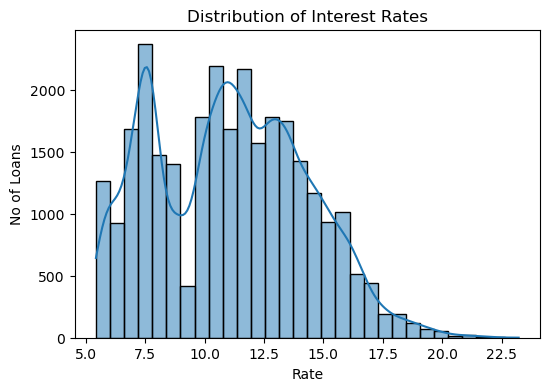

In [25]:
#Distribution of interest rataes
# Histogram 

plt.figure(figsize=(6,4))
sns.histplot(df1['loan_int_rate'], bins=30, kde=True)
plt.title("Distribution of Interest Rates")
plt.xlabel("Rate")
plt.ylabel("No of Loans")
plt.show()

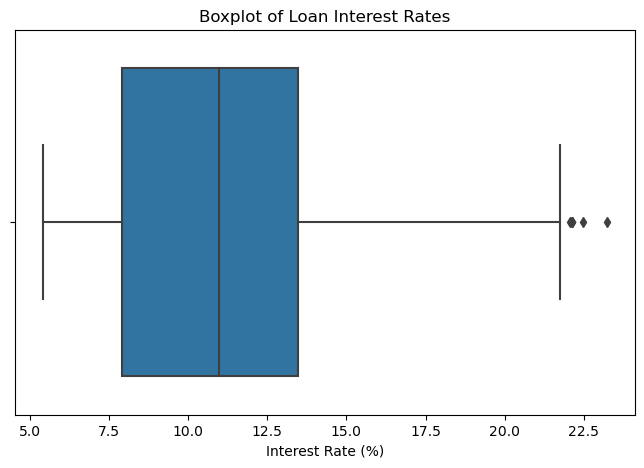

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df1['loan_int_rate'])
plt.title("Boxplot of Loan Interest Rates")
plt.xlabel("Interest Rate (%)")
plt.show()

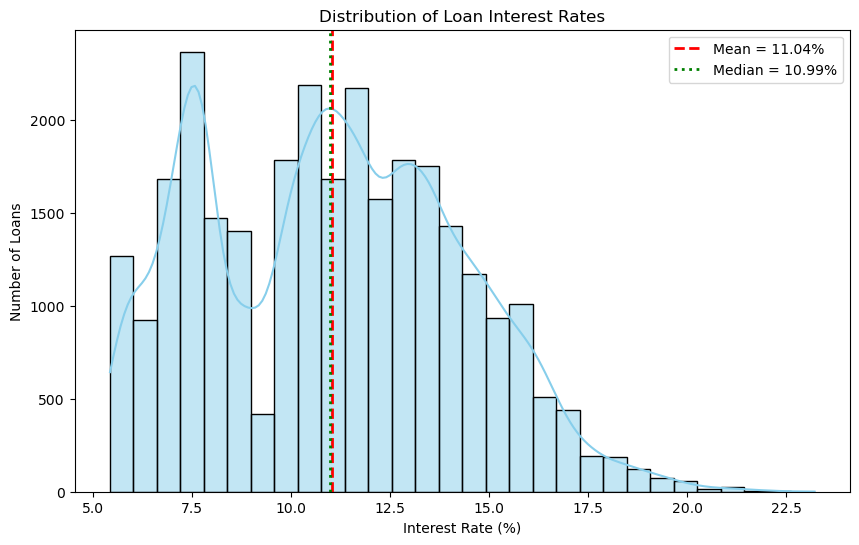

In [27]:
plt.figure(figsize=(10,6))

# Histogram + KDE
sns.histplot(df1['loan_int_rate'], bins=30, kde=True, color="skyblue", edgecolor="black")

# Mean & Median
mean_val = df1['loan_int_rate'].mean()
median_val = df1['loan_int_rate'].median()

plt.axvline(mean_val, color="red", linestyle="--", linewidth=2, label=f"Mean = {mean_val:.2f}%")
plt.axvline(median_val, color="green", linestyle=":", linewidth=2, label=f"Median = {median_val:.2f}%")

# Labels
plt.title("Distribution of Loan Interest Rates")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Number of Loans")
plt.legend()
plt.show()

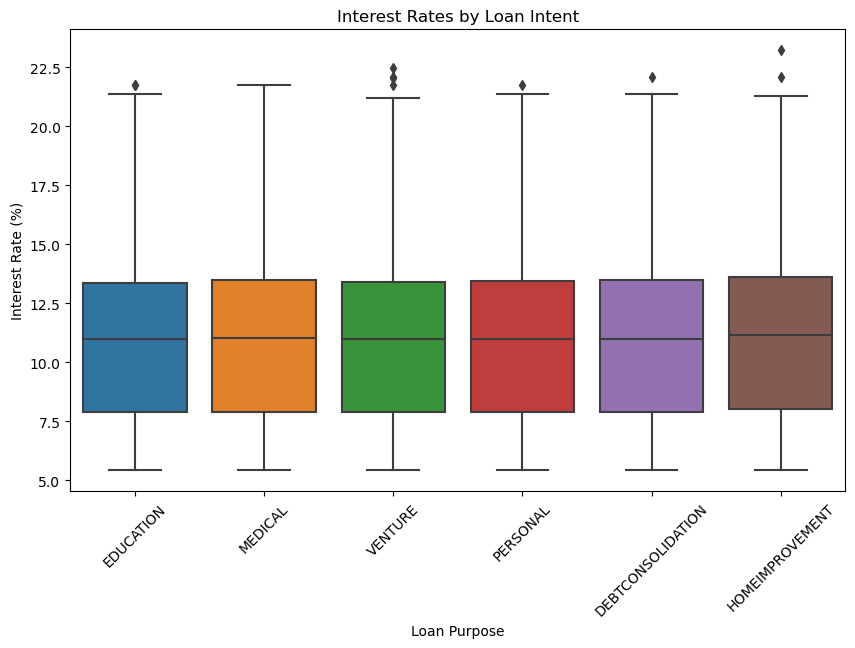

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x="loan_intent", y="loan_int_rate", data=df1, order=df1['loan_intent'].value_counts().index)
plt.title("Interest Rates by Loan Intent")
plt.xlabel("Loan Purpose")
plt.ylabel("Interest Rate (%)")
plt.xticks(rotation=45)
plt.show()

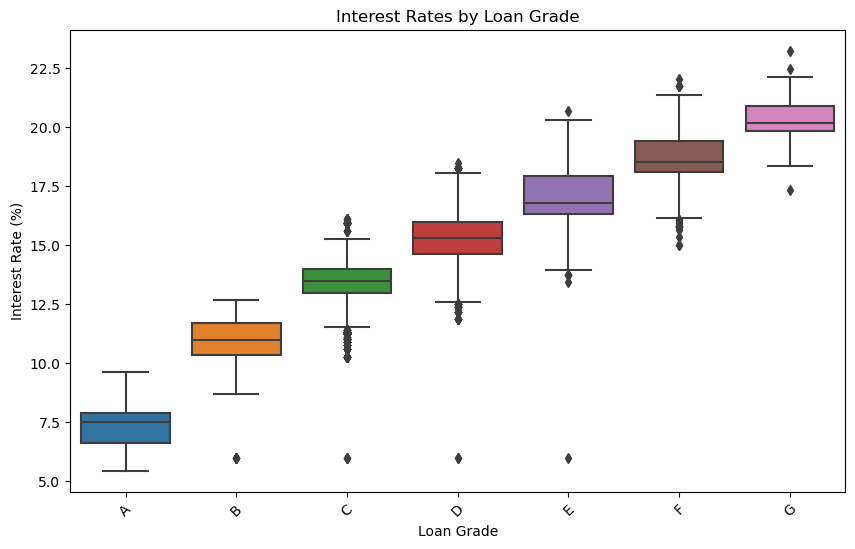

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x="loan_grade", y="loan_int_rate", data=df1, order=df1['loan_grade'].value_counts().index)
plt.title("Interest Rates by Loan Grade")
plt.xlabel("Loan Grade")
plt.ylabel("Interest Rate (%)")
plt.xticks(rotation=45)
plt.show()

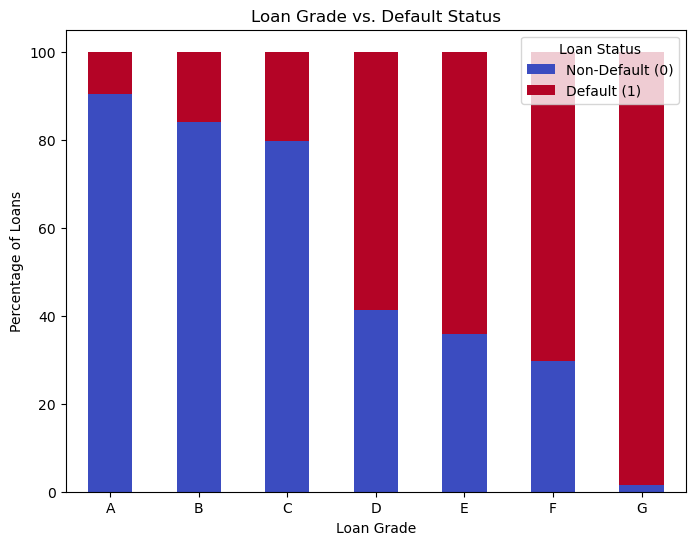

In [30]:
# Get counts of loan_status per loan_grade
grade_status = df1.groupby(["loan_grade", "loan_status"]).size().unstack(fill_value=0)

# Normalize to percentages
grade_status_pct = grade_status.div(grade_status.sum(axis=1), axis=0) * 100

# Plot stacked bar
grade_status_pct.plot(kind="bar", stacked=True, figsize=(8,6), colormap="coolwarm")

plt.title("Loan Grade vs. Default Status")
plt.xlabel("Loan Grade")
plt.ylabel("Percentage of Loans")
plt.legend(["Non-Default (0)", "Default (1)"], title="Loan Status")
plt.xticks(rotation=0)
plt.show()

In [31]:

# Columns focused on credit behavior/history
credit_numeric = [
    "cb_person_cred_hist_length",   # years
    "open_accounts",
    "credit_utilization_ratio",     # 0-1 (can exceed 1 in messy data)
    "past_delinquencies"            # count
]
past_default_col = "cb_person_default_on_file"  # 'Y'/'N'
target = "loan_status"  # 0/1

df_cb = df1.copy()

# Ensure numeric types (coerce errors to NaN so plots/corr work)
for c in credit_numeric:
    df_cb[c] = pd.to_numeric(df_cb[c], errors="coerce")

# Encode past default Y/N -> 1/0 (keep NaN if missing)
df_cb["past_default_flag"] = df_cb[past_default_col].map({"Y": 1, "N": 0})


In [32]:
def summarize_credit_vars(d, vars_numeric, past_flag, y=target):
    rows = []
    for col in vars_numeric + [past_flag]:
        # correlation (Pearson with binary target = point-biserial)
        sub = d[[col, y]].dropna()
        corr = sub[col].corr(sub[y]) if sub.shape[0] > 1 else np.nan

        # group means
        g = d.groupby(y)[col].mean()
        mean0 = g.get(0, np.nan)
        mean1 = g.get(1, np.nan)
        diff = mean1 - mean0

        # Cohen's d
        gstats = d.groupby(y)[col].agg(['mean','std','count'])
        try:
            s0, s1 = gstats.loc[0, 'std'], gstats.loc[1, 'std']
            n0, n1 = gstats.loc[0, 'count'], gstats.loc[1, 'count']
            sp = np.sqrt(((n0-1)*s0**2 + (n1-1)*s1**2) / ((n0-1)+(n1-1)))
            cohend = diff / sp if sp not in [0, np.nan] else np.nan
        except Exception:
            cohend = np.nan

        rows.append({
            "feature": col,
            "corr_with_default": corr,
            "mean_nondefault(0)": mean0,
            "mean_default(1)": mean1,
            "difference(1-0)": diff,
            "cohens_d": cohend
        })
    return pd.DataFrame(rows).sort_values("corr_with_default", ascending=False)

summary_tbl = summarize_credit_vars(df_cb, credit_numeric, "past_default_flag")
summary_tbl


,feature,corr_with_default,mean_nondefault(0),mean_default(1),difference(1-0),cohens_d
4,past_default_flag,0.18,0.14,0.31,0.17,0.45
2,credit_utilization_ratio,0.01,0.50,0.50,0.00,0.02
3,past_delinquencies,-0.00,0.51,0.50,-0.00,-0.00
1,open_accounts,-0.00,8.05,8.00,-0.04,-0.01
0,cb_person_cred_hist_length,-0.02,5.85,5.68,-0.17,-0.04


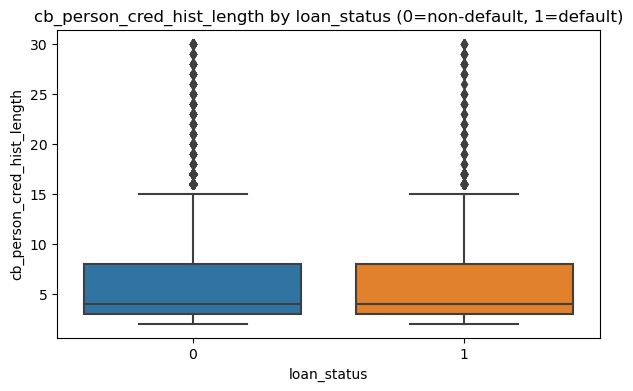

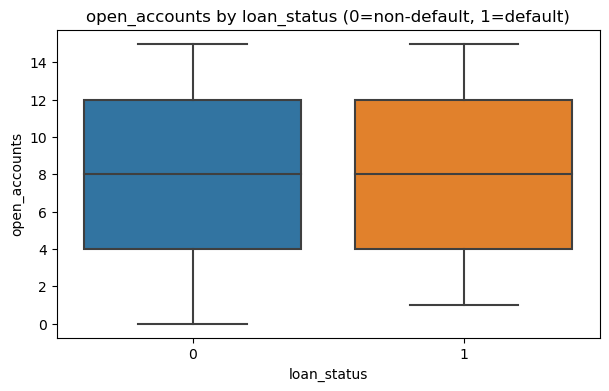

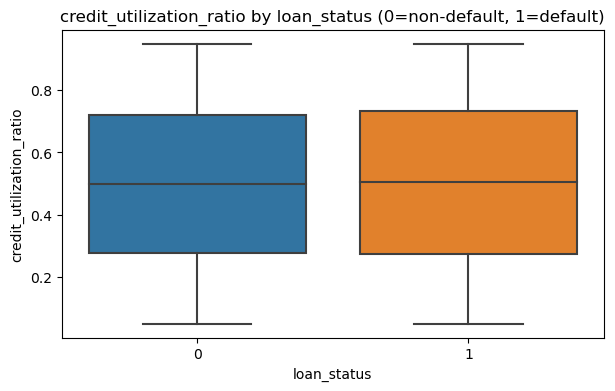

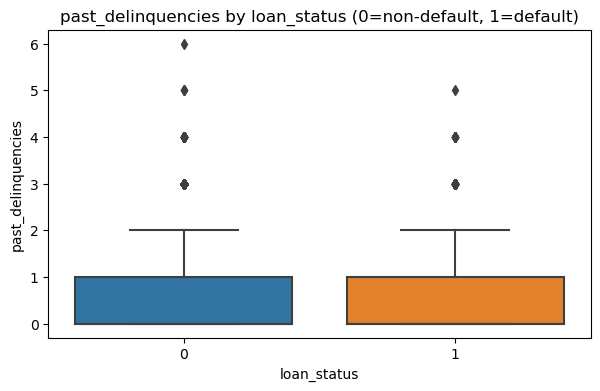

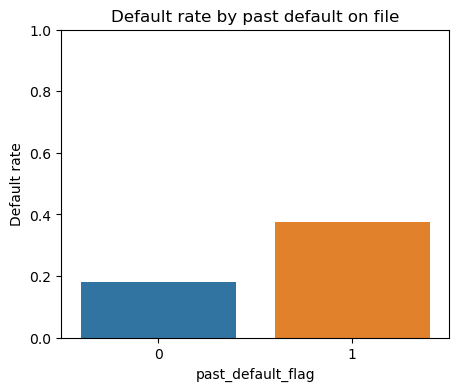

In [33]:
for col in credit_numeric:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=target, y=col, data=df_cb)
    plt.title(f"{col} by {target} (0=non-default, 1=default)")
    plt.xlabel("loan_status")
    plt.ylabel(col)
    plt.show()

# Past default (categorical)
plt.figure(figsize=(5,4))
default_rate = df_cb.groupby("past_default_flag")[target].mean().reset_index()
sns.barplot(x="past_default_flag", y=target, data=default_rate)
plt.title("Default rate by past default on file")
plt.ylabel("Default rate")
plt.ylim(0,1)
plt.show()


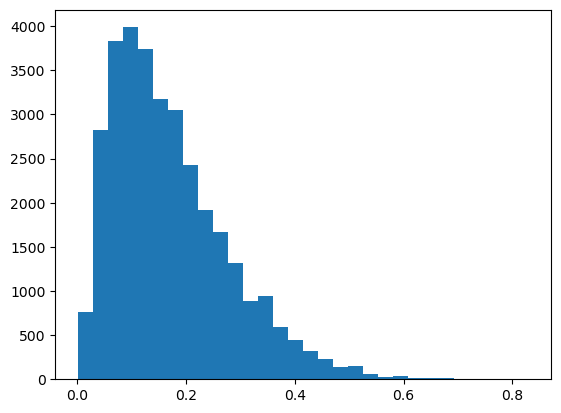

In [48]:
#Analyzing high risk borrowers (loan_to_income_ratio >x). let's determine x

plt.hist(df['loan_to_income_ratio'], bins=30)
plt.show()

In [50]:
df1['loan_to_income_ratio'].describe()

count   31,679.00
mean         0.17
std          0.11
min          0.00
25%          0.09
50%          0.15
75%          0.23
max          0.83
Name: loan_to_income_ratio, dtype: float64

In [53]:
df = df1.copy()  # avoid SettingWithCopyWarning

# Ensure ratio is numeric
df['loan_to_income_ratio'] = pd.to_numeric(df['loan_to_income_ratio'], errors='coerce')
df = df.dropna(subset=['loan_to_income_ratio', 'loan_status']).copy()



/var/folders/mq/0jf30gr10vz_glj547t440zr0000gp/T/ipykernel_1741/5585356.py:5: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



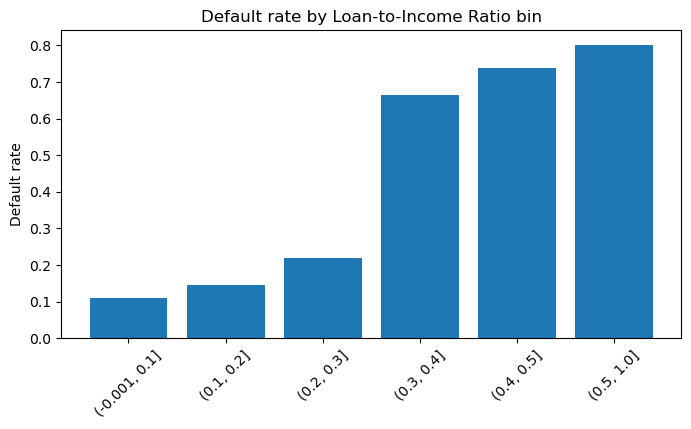

In [54]:
import matplotlib.pyplot as plt

# Example: bins in fractions (0.1 = 10%)
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0]
df.loc[:, 'lti_bin'] = pd.cut(df['loan_to_income_ratio'], bins=bins, include_lowest=True)

# Default rate per bin
default_rates = (
    df.groupby('lti_bin')['loan_status']
      .agg(default_rate='mean', n='count')
      .reset_index()
)

# Plot
plt.figure(figsize=(8,4))
plt.bar(default_rates['lti_bin'].astype(str), default_rates['default_rate'])
plt.xticks(rotation=45)
plt.ylabel('Default rate')
plt.title('Default rate by Loan-to-Income Ratio bin')
plt.show()


In [55]:
#Choose Threshold X
X_percentile = df['loan_to_income_ratio'].quantile(0.80)
print("X (80th percentile) =", X_percentile)


X (80th percentile) = 0.25


In [56]:
default_rates['diff'] = default_rates['default_rate'].diff().fillna(0)
elbow_idx = default_rates['diff'].idxmax()
X_elbow = default_rates.loc[elbow_idx, 'lti_bin'].mid  # midpoint of that bin
print("X (elbow method) =", X_elbow)


X (elbow method) = 0.35


In [57]:
X = X_elbow  # or X_elbow
df['high_risk_lti'] = df['loan_to_income_ratio'] > X

# KPI: % of borrowers above threshold
high_risk_pct = df['high_risk_lti'].mean()
# KPI: default rate within that group
high_risk_default_rate = df.loc[df['high_risk_lti'], 'loan_status'].mean()

print(f"High-risk borrowers (> {X:.2f}): {high_risk_pct:.1%}")
print(f"Default rate among high-risk group: {high_risk_default_rate:.1%}")


High-risk borrowers (> 0.35): 7.0%
Default rate among high-risk group: 72.3%


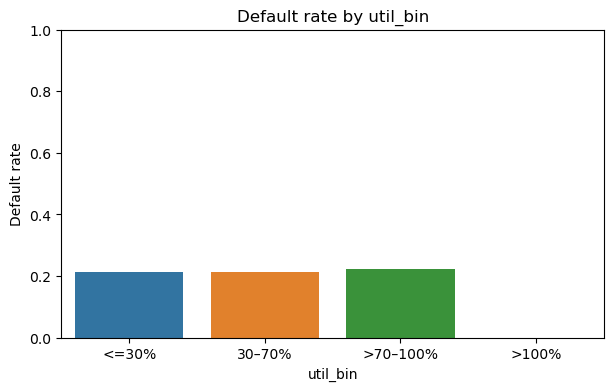

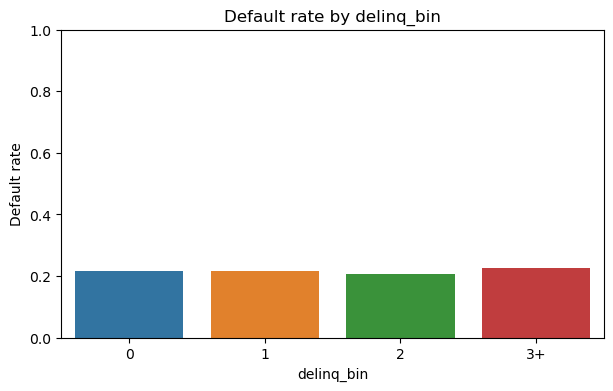

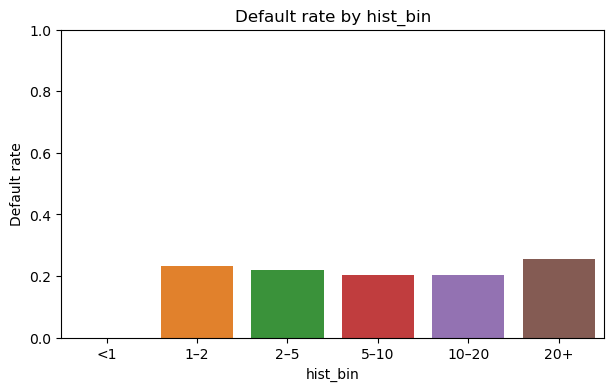

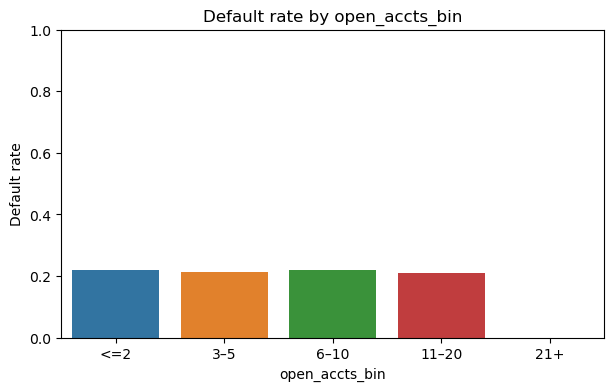

In [35]:
# Utilization bins
df_cb["util_bin"] = pd.cut(
    df_cb["credit_utilization_ratio"],
    bins=[-np.inf, 0.3, 0.7, 1.0, np.inf],
    labels=["<=30%", "30–70%", ">70–100%", ">100%"]
)

# Delinquency bins
df_cb["delinq_bin"] = pd.cut(
    df_cb["past_delinquencies"],
    bins=[-np.inf, 0, 1, 2, np.inf],
    labels=["0", "1", "2", "3+"]
)

# Credit history length bins (years)
df_cb["hist_bin"] = pd.cut(
    df_cb["cb_person_cred_hist_length"],
    bins=[-np.inf, 1, 2, 5, 10, 20, np.inf],
    labels=["<1", "1–2", "2–5", "5–10", "10–20", "20+"]
)

# Open accounts bins
df_cb["open_accts_bin"] = pd.cut(
    df_cb["open_accounts"],
    bins=[-np.inf, 2, 5, 10, 20, np.inf],
    labels=["<=2", "3–5", "6–10", "11–20", "21+"]
)

# Plot default rates by each bin
for b in ["util_bin","delinq_bin","hist_bin","open_accts_bin"]:
    rate = df_cb.groupby(b)[target].mean().reset_index()
    plt.figure(figsize=(7,4))
    sns.barplot(x=b, y=target, data=rate, order=rate[b].astype(str))
    plt.title(f"Default rate by {b}")
    plt.ylabel("Default rate")
    plt.ylim(0,1)
    plt.xlabel(b)
    plt.show()


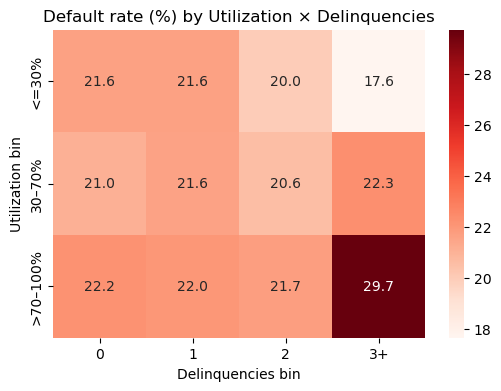

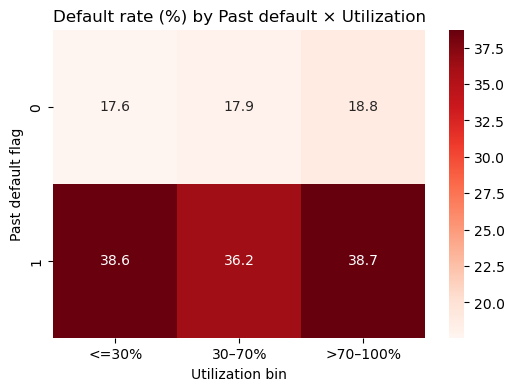

In [36]:
# Utilization x Delinquencies
pivot1 = pd.crosstab(df_cb["util_bin"], df_cb["delinq_bin"], values=df_cb[target], aggfunc="mean") * 100
plt.figure(figsize=(6,4))
sns.heatmap(pivot1, annot=True, fmt=".1f", cmap="Reds")
plt.title("Default rate (%) by Utilization × Delinquencies")
plt.ylabel("Utilization bin"); plt.xlabel("Delinquencies bin")
plt.show()

# Past default x Utilization
pivot2 = pd.crosstab(df_cb["past_default_flag"], df_cb["util_bin"], values=df_cb[target], aggfunc="mean") * 100
plt.figure(figsize=(6,4))
sns.heatmap(pivot2, annot=True, fmt=".1f", cmap="Reds")
plt.title("Default rate (%) by Past default × Utilization")
plt.ylabel("Past default flag"); plt.xlabel("Utilization bin")
plt.show()


In [45]:
#Save file for furtehr use in Tableau
df1.to_csv("credit_risk_cleaned.csv", index=False)

---

## ✅ Summary & Next Steps

This notebook prepared and explored the credit risk dataset to uncover key patterns and support interactive visualization.

**Key data preparation steps:**
- Checked and handled missing values .
- Detected and flagged outliers in financial variables.
- Grouped and profiled borrower features (income, LTI, DTI, home ownership, employment).
- Created a clean dataset ready for visualization.

**Key findings during EDA:**
- Past default history strongly correlates with new defaults.
- Some loan purposes (debt consolidation, medical, home improvement) show disproportionately high default rates.
- Loan-to-Income and Debt-to-Income ratios are among the strongest risk drivers.
- Interest rates don’t vary much across terms or purposes despite differing risk levels.

📊 **Visual storytelling:**  
These insights were turned into 3 interactive dashboards in Tableau to help decision-makers quickly understand portfolio structure, risk drivers, and borrower profiles.

---

💡 **Next steps:**
- Extend analysis with predictive modeling (e.g., logistic regression, gradient boosting) for risk scoring.
- Refine KPIs and thresholds for early warning systems.
- Incorporate additional borrower behavior signals over time.

---
